<a href="https://colab.research.google.com/github/seangupta/chess-engine/blob/master/DL_1819_CW1_Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning: Coursework 1

**Student Name:**  Sean Gupta (Student Number: 18071288 )

**Start date:** *15th January 2019*

**Due date:** *05th February 2019, 09:00 am*

## How to Submit

When you have completed the exercises and everything has finished running, click on 'File' in the menu-bar and then 'Download .ipynb'. This file must be submitted to Moodle named as **studentnumber_DL_cw1.ipynb** before the deadline above.

Please produce a **pdf** with all the **results** (tables and plots) as well as the **answers** to the questions below. For this assignment, you don't need to include any of the code in the pdf, but answers to the questions should be self-contained and should not rely on a code reference.  Page limit: 15 pg. 


### IMPORTANT
Please make sure you submission includes **all results/plots/tables** required for grading. We should not have to re-run your code.



# Assignment Description

## The Data

### Handwritten Digit Recognition Dataset (MNIST)

In this assignment we will be using the [MNIST digit dataset](https://yann.lecun.com/exdb/mnist/). 

The dataset contains images of hand-written digits ($0-9$), and the corresponding labels. 

The images have a resolution of $28\times 28$ pixels.

### The MNIST Dataset in TensorFlow

You can use the tensorflow build-in functionality to download and import the dataset into python (see *Setup* section below).



## The Assignment

### Objectives

Familiarise yourselves with Tensorflow and basic concepts we have covered in the course: like simple neural network models (fully connected models, convolutional networks) and backpropagation.

You will then train these models to classify hand written digits from the Mnist dataset.

### Variable Initialization

Initialize the variables containing the parameters using [Xavier initialization](http://proceedings.mlr.press/v9/glorot10a.html).

    initializer = tf.contrib.layers.xavier_initializer()
    my_variable = tf.Variable(initializer(shape))

### Hyper-parameters

For each of these models you will be requested to run experiments with different hyper-parameters.

More specifically, you will be requested to try 3 sets of hyper-parameters per model, and report the resulting model accuracy.

Each combination of hyper-parameter will specify how to set each of the following:

- **num_epochs**: Number of iterations through the training section of the dataset [*a positive integer*].

- **learning_rate**: Learning rate used by the gradient descent optimizer [*a scalar between 0 and 1*]

In all experiments use a *batch_size* of 100.

### Loss function
All models, should be trained as to minimize the **cross-entropy loss** function:
$$
\mathrm{loss}
~~=~~
-\sum_{i=1}^N \log p(y_i|x_i, \theta)
~~=~~
-\sum_{i=1}^N \log{ \underbrace{\left(\frac{\exp(z_{i}[y_i])}{\sum_{c=1}^{10} \exp(z_{i}[c])}\right)}_{\text{softmax output}}}
~~=~~
\sum_{i=1}^N \left( -z_{i}[y_i] + \log{\left( \sum_{c=1}^{10} \exp(z_{i}[c]) \right)} \right)$$
where $z \in \mathbb{R}^{10}$ is the input to the softmax layer and $z{[c]}$ denotes the $c$-th entry of vector $z$. And $i$ is a index for the dataset $\{(x_i, y_i)\}_{i=1}^N$.

*Note*: Sum the loss across the elements of the batch with tf.reduce_sum().

*Hint*: read about TensorFlow's [tf.nn.softmax_cross_entropy_with_logits](https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits) function.

### Optimization

Use **stochastic gradient descent (SGD)** for optimizing the loss function.

*Hint*: read about TensorFlow's [tf.train.GradientDescentOptimizer()](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer).


### Training and Evaluation

The tensorflow built-in functionality for downloading and importing the dataset into python returns a Datasets object.

This object will have three attributes: 

- train

- validation

- test

Use only the **train** data in order to optimize the model.

Use *datasets.train.next_batch(100)* in order to sample mini-batches of data.

Every 20000 training samples (i.e. every 200 updates to the model), interrupt training and measure the accuracy of the model, 
each time evaluate the accuracy of the model both on **20% of the train set** and on **the entire test set**.

### Reporting

For each model `i`, you will collect the learning curves associated to each combination of hyper-parameters.

Use the utility function `plot_learning_curves` to plot these learning curves,

and the utility function `plot_summary_table` to generate a summary table of results.

For each run collect the train and test curves in a tuple, together with the hyper-parameters.

    experiments_task_i = [

       ((num_epochs_1, learning_rate_1), train_accuracy_1, test_accuracy_1),
    
       ((num_epochs_2, learning_rate_2), train_accuracy_2, test_accuracy_2),
    
       ((num_epochs_3, learning_rate_3), train_accuracy_3, test_accuracy_3)]

### Hint 

If you need some extra help, familiarizing yourselves with the dataset and the task of building models in TensorFlow, you can check the [TF tutorial for MNIST](https://www.tensorflow.org/tutorials/mnist/beginners/). 

The tutorial will walk you through the MNIST classification task step-by-step, building and optimizing a model in TensorFlow. 

(Please do not copy the provided code, though. Walk through the tutorial, but write your own implementation).

# Imports and utility functions (do not modify!)

In [0]:
# Import useful libraries.
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

# Global variables.
log_period_samples = 20000
batch_size = 100

# Import dataset with one-hot encoding of the class labels.
def get_data():
  return input_data.read_data_sets("MNIST_data/", one_hot=True)

# Placeholders to feed train and test data into the graph.
# Since batch dimension is 'None', we can reuse them both for train and eval.
def get_placeholders():
  x = tf.placeholder(tf.float32, [None, 784])
  y_ = tf.placeholder(tf.float32, [None, 10])
  return x, y_

# Plot learning curves of experiments
def plot_learning_curves(experiment_data):
  # Generate figure.
  fig, axes = plt.subplots(3, 3, figsize=(16,12))
  st = fig.suptitle(
      "Learning Curves for all Tasks and Hyper-parameter settings",
      fontsize="x-large")
  # Plot all learning curves.
  for i, results in enumerate(experiment_data):
    for j, (setting, train_accuracy, test_accuracy) in enumerate(results):
      # Plot.
      xs = [x * log_period_samples for x in range(1, len(train_accuracy)+1)]
      print(train_accuracy)
      axes[j, i].plot(xs, train_accuracy, label='train_accuracy')
      axes[j, i].plot(xs, test_accuracy, label='test_accuracy')
      # Prettify individual plots.
      axes[j, i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
      axes[j, i].set_xlabel('Number of samples processed')
      axes[j, i].set_ylabel('Epochs: {}, Learning rate: {}.  Accuracy'.format(*setting))
      axes[j, i].set_title('Task {}'.format(i + 1))
      axes[j, i].legend()
  # Prettify overall figure.
  plt.tight_layout()
  st.set_y(0.95)
  fig.subplots_adjust(top=0.91)
  plt.show()

# Generate summary table of results.
def plot_summary_table(experiment_data):
  # Fill Data.
  cell_text = []
  rows = []
  columns = ['Setting 1', 'Setting 2', 'Setting 3']
  for i, results in enumerate(experiment_data):
    rows.append('Model {}'.format(i + 1))
    cell_text.append([])
    for j, (setting, train_accuracy, test_accuracy) in enumerate(results):
      if test_accuracy != []:
        cell_text[i].append(test_accuracy[-1])
      else:
        print('Warning: Something went wrong! Missing testing/training data')
  # Generate Table.
  fig=plt.figure(frameon=False)
  ax = plt.gca()
  the_table = ax.table(
      cellText=cell_text,
      rowLabels=rows,
      colLabels=columns,
      loc='center')
  the_table.scale(1, 4)
  # Prettify.
  ax.patch.set_facecolor('None')
  ax.xaxis.set_visible(False)
  ax.yaxis.set_visible(False)
  
  
def tf_print(op, tensors, message=None):
    def print_message(x):
        sys.stdout.write(message + " %s\n" % x)
        return x

    prints = [tf.py_func(print_message, [tensor], tensor.dtype) for tensor in tensors]
    with tf.control_dependencies(prints):
        op = tf.identity(op)
    return op


# PART 1: TensorFlow + Simple NN models  (30 pts) 

## Model 1 (5 pts)

### Network

Train a neural network model consisting of 1 linear layer, followed by a softmax:

(input $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.0001

- *num_epochs*=5, *learning_rate*=0.005

- *num_epochs*=15, *learning_rate*=0.1

In [2]:
# Store results of runs with different configurations in a list.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task1 = []
settings = [(5, 0.0001), (5, 0.001), (15, 0.1)]

print('Training Model 1')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  print("num_epochs =", num_epochs, "learning_rate =", learning_rate)
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()
  x, y_ = get_placeholders()
  mnist = get_data()
  eval_mnist = get_data()

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  n_input = 784
  n_output = 10
  n_train = mnist.train.num_examples
  n_test = mnist.test.num_examples
  
  class NNsimple(object):
    
    def __init__(self):
      self.W = tf.get_variable('W',dtype=tf.float32,shape=[n_input,n_output],
                              initializer=tf.contrib.layers.xavier_initializer())
      self.b = tf.get_variable('b',dtype=tf.float32,shape=[1,n_output],
                              initializer=tf.zeros_initializer())
      
    def __call__(self,x):
      return tf.matmul(x,self.W) + self.b
  
  model1 = NNsimple()
  model_output = model1(x)
  correct_prediction = tf.equal(tf.argmax(model_output, 1), tf.argmax(y_, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  cross_entropy = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=model_output))
  update = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cross_entropy)
  
  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:
      
#       print("W", sess.run(model1.W))
#       print("b", sess.run(model1.b))
      
      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
#       print(batch_xs.shape)
#       print(batch_ys.shape)
      
      #################
      # Training step #
      #################
      feed_dict = {x: batch_xs, y_: batch_ys}
      sess.run(update,feed_dict=feed_dict)
      
      # Periodically evaluate.
      if i % log_period_updates == 0:
        
        #####################################
        # Compute and store train accuracy. #
        #####################################
   
        tr_xs, tr_ys = mnist.train.next_batch(n_train/5)
        #sess.run([model_output,cross_entropy], feed_dict={x: tr_xs, y_: tr_ys})
        #print("Iteration", str(i), "training loss", sess.run(cross_entropy, feed_dict={x: tr_xs, y_: tr_ys}))
        #train_accuracy.append(cross_entropy.eval(session=sess,feed_dict={x: tr_xs, y_: tr_ys}))
        sess.run(accuracy, feed_dict={x: tr_xs, y_: tr_ys})
        train_accuracy.append(accuracy.eval(session=sess, feed_dict={x: tr_xs, y_: tr_ys}))
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        te_xs, te_ys = mnist.test.next_batch(n_test)
        #sess.run([model_output,cross_entropy], feed_dict={x: te_xs, y_: te_ys})
        #print("test loss", sess.run(cross_entropy, feed_dict={x: te_xs, y_: te_ys}))
        #test_accuracy.append(cross_entropy.eval(session=sess,feed_dict={x: te_xs, y_: te_ys}))
        sess.run(accuracy, feed_dict={x: te_xs, y_: te_ys})
        test_accuracy.append(accuracy.eval(session=sess, feed_dict={x: te_xs, y_: te_ys}))
      
    experiments_task1.append(
      ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 1
('num_epochs =', 5, 'learning_rate =', 0.0001)
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updati

## Model 2 (5 pts)

### Network
1 hidden layer (32 units) with a ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=15, *learning_rate*=0.0001

- *num_epochs*=15, *learning_rate*=0.005

- *num_epochs*=15, *learning_rate*=0.1 

In [3]:
# Store results of runs with different configurations in a list.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task2 = []
settings = [(15, 0.0001), (15, 0.005), (15, 0.1)]

print('Training Model 2')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################

  n_input = 784
  n_hidden = 32
  n_output = 10
  n_train = mnist.train.num_examples
  n_test = mnist.test.num_examples
  
  class NNsimple2(object):
    
    def __init__(self):
      self.W1 = tf.get_variable('W1',dtype=tf.float32,shape=[n_input,n_hidden],
                              initializer=tf.contrib.layers.xavier_initializer())
      self.W2 = tf.get_variable('W2',dtype=tf.float32,shape=[n_hidden,n_output],
                              initializer=tf.contrib.layers.xavier_initializer())
      self.b1 = tf.get_variable('b1',dtype=tf.float32,shape=[1,n_hidden],
                              initializer=tf.zeros_initializer())
      self.b2 = tf.get_variable('b2',dtype=tf.float32,shape=[1,n_output],
                              initializer=tf.zeros_initializer()) 
      
    def __call__(self,x):
      return tf.matmul(tf.nn.relu(tf.matmul(x,self.W1) + self.b1), self.W2) + self.b2
  
  model2 = NNsimple2()
  model_output = model2(x)
  correct_prediction = tf.equal(tf.argmax(model_output, 1), tf.argmax(y_, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  cross_entropy = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=model_output))
  update = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cross_entropy)
  
  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:
      
#       print("W", sess.run(model1.W))
#       print("b", sess.run(model1.b))
      
      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
#       print(batch_xs.shape)
#       print(batch_ys.shape)
      
      #################
      # Training step #
      #################
      feed_dict = {x: batch_xs, y_: batch_ys}
      sess.run(update,feed_dict=feed_dict)
      
      # Periodically evaluate.
      if i % log_period_updates == 0:
        
        #####################################
        # Compute and store train accuracy. #
        #####################################
   
        tr_xs, tr_ys = mnist.train.next_batch(n_train/5)
        #sess.run([model_output,cross_entropy], feed_dict={x: tr_xs, y_: tr_ys})
        #print("Iteration", str(i), "training loss", sess.run(cross_entropy, feed_dict={x: tr_xs, y_: tr_ys}))
        #train_accuracy.append(cross_entropy.eval(session=sess,feed_dict={x: tr_xs, y_: tr_ys}))
        sess.run(accuracy, feed_dict={x: tr_xs, y_: tr_ys})
        train_accuracy.append(accuracy.eval(session=sess, feed_dict={x: tr_xs, y_: tr_ys}))
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        te_xs, te_ys = mnist.test.next_batch(n_test)
        #sess.run([model_output,cross_entropy], feed_dict={x: te_xs, y_: te_ys})
        #print("test loss", sess.run(cross_entropy, feed_dict={x: te_xs, y_: te_ys}))
        #test_accuracy.append(cross_entropy.eval(session=sess,feed_dict={x: te_xs, y_: te_ys}))
        sess.run(accuracy, feed_dict={x: te_xs, y_: te_ys})
        test_accuracy.append(accuracy.eval(session=sess, feed_dict={x: te_xs, y_: te_ys}))
        
    experiments_task2.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 2
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensor

## Model 3 (5 pts)

### Network
2 hidden layers (32 units) each, with ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)


### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.001

- *num_epochs*=40, *learning_rate*=0.001

- *num_epochs*=40, *learning_rate*=0.05

In [4]:
# Store results of runs with different configurations in a list.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task3 = []
settings = [(5, 0.001), (40, 0.001), (40, 0.05)]

print('Training Model 3')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################

  n_input = 784
  n_hidden1 = 32
  n_hidden2 = 32
  n_output = 10
  n_train = mnist.train.num_examples
  n_test = mnist.test.num_examples
  
  class NNsimple3(object):
    
    def __init__(self):
      self.W1 = tf.get_variable('W1',dtype=tf.float32,shape=[n_input,n_hidden1],
                              initializer=tf.contrib.layers.xavier_initializer())
      self.W2 = tf.get_variable('W2',dtype=tf.float32,shape=[n_hidden1,n_hidden2],
                              initializer=tf.contrib.layers.xavier_initializer())
      self.W3 = tf.get_variable('W3',dtype=tf.float32,shape=[n_hidden2,n_output],
                              initializer=tf.contrib.layers.xavier_initializer())
      self.b1 = tf.get_variable('b1',dtype=tf.float32,shape=[1,n_hidden1],
                              initializer=tf.zeros_initializer())
      self.b2 = tf.get_variable('b2',dtype=tf.float32,shape=[1,n_hidden2],
                              initializer=tf.zeros_initializer())
      self.b3 = tf.get_variable('b3',dtype=tf.float32,shape=[1,n_output],
                              initializer=tf.zeros_initializer())
      
    def __call__(self,x):
      return tf.matmul(tf.nn.relu(tf.matmul(tf.nn.relu(tf.matmul(x,self.W1) + self.b1), self.W2) + self.b2),self.W3) + self.b3
  
  model3 = NNsimple3()
  model_output = model3(x)
  correct_prediction = tf.equal(tf.argmax(model_output, 1), tf.argmax(y_, 1))
  accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
  cross_entropy = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=model_output))
  update = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cross_entropy)
  
  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:
      
#       print("W", sess.run(model1.W))
#       print("b", sess.run(model1.b))
      
      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
#       print(batch_xs.shape)
#       print(batch_ys.shape)
      
      #################
      # Training step #
      #################
      feed_dict = {x: batch_xs, y_: batch_ys}
      sess.run(update,feed_dict=feed_dict)
      
      # Periodically evaluate.
      if i % log_period_updates == 0:
        
        #####################################
        # Compute and store train accuracy. #
        #####################################
   
        tr_xs, tr_ys = mnist.train.next_batch(n_train/5)
        #sess.run([model_output,cross_entropy], feed_dict={x: tr_xs, y_: tr_ys})
        #print("Iteration", str(i), "training loss", sess.run(cross_entropy, feed_dict={x: tr_xs, y_: tr_ys}))
        #train_accuracy.append(cross_entropy.eval(session=sess,feed_dict={x: tr_xs, y_: tr_ys}))
        sess.run(accuracy, feed_dict={x: tr_xs, y_: tr_ys})
        train_accuracy.append(accuracy.eval(session=sess, feed_dict={x: tr_xs, y_: tr_ys}))
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        te_xs, te_ys = mnist.test.next_batch(n_test)
        #sess.run([model_output,cross_entropy], feed_dict={x: te_xs, y_: te_ys})
        #print("test loss", sess.run(cross_entropy, feed_dict={x: te_xs, y_: te_ys}))
        #test_accuracy.append(cross_entropy.eval(session=sess,feed_dict={x: te_xs, y_: te_ys}))
        sess.run(accuracy, feed_dict={x: te_xs, y_: te_ys})
        test_accuracy.append(accuracy.eval(session=sess, feed_dict={x: te_xs, y_: te_ys}))

    experiments_task3.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 3
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensor

# Results

[0.7507273, 0.8151818, 0.83772725, 0.84736365, 0.8502727, 0.8642727, 0.85490906, 0.8701818, 0.86236364]
[0.8728182, 0.88036364, 0.8953636, 0.8980909, 0.8972727, 0.9039091, 0.90572727, 0.90818185, 0.907]
[0.86736363, 0.87372726, 0.8879091, 0.8815455, 0.86554545, 0.83181816, 0.85818183, 0.8978182, 0.84181815, 0.90427274, 0.9061818, 0.898, 0.91254544, 0.87436366, 0.8947273, 0.8454546, 0.87554544, 0.8354545, 0.91490906, 0.89745456, 0.88772726, 0.9069091, 0.9002727, 0.88945454, 0.901, 0.90263635]
[0.67445457, 0.7999091, 0.82690907, 0.845, 0.86863637, 0.87381816, 0.87563634, 0.884, 0.893, 0.8867273, 0.8953636, 0.8957273, 0.90427274, 0.90572727, 0.9030909, 0.90254545, 0.91145456, 0.90845454, 0.9071818, 0.9087273, 0.9096364, 0.9095455, 0.913, 0.91827273, 0.91581815, 0.9180909]
[0.89336365, 0.93463635, 0.94427276, 0.9482727, 0.9488182, 0.9540909, 0.95845455, 0.95681816, 0.9572727, 0.96590906, 0.9654545, 0.9645454, 0.96836364, 0.9653636, 0.9669091, 0.9671818, 0.9700909, 0.97354543, 0.97, 0.974, 

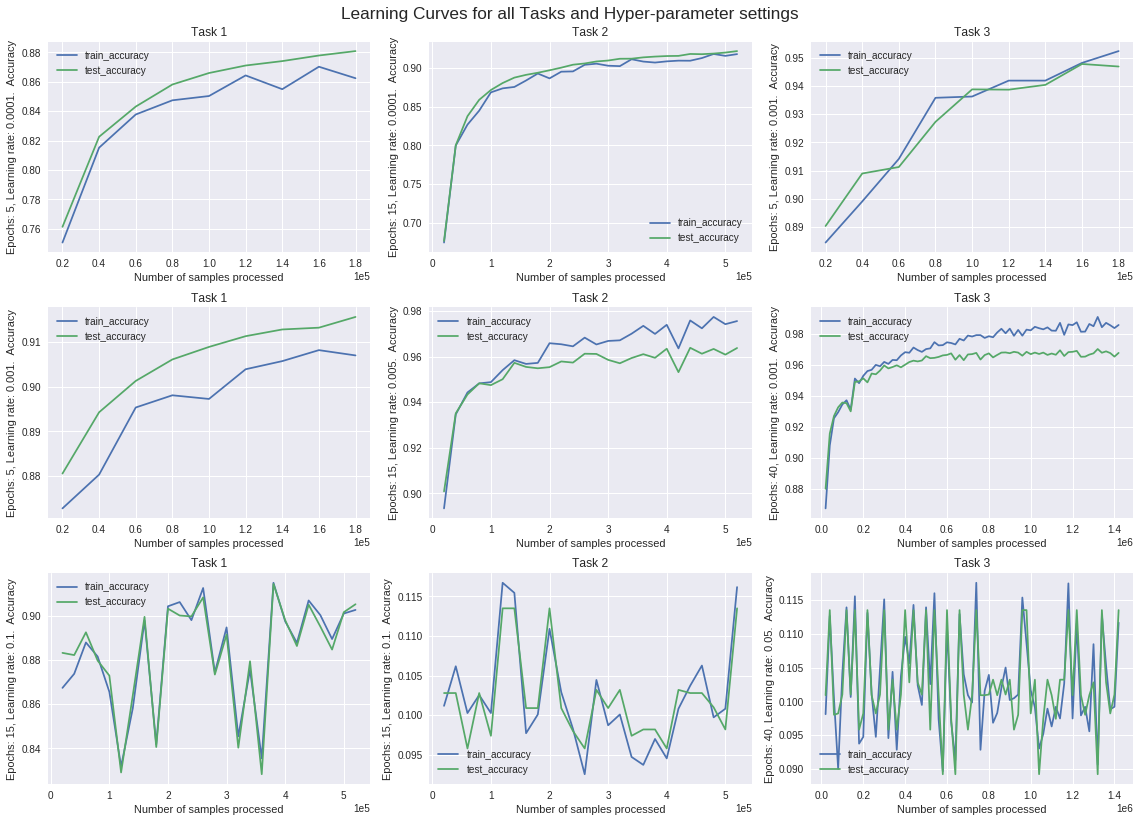

In [5]:
plot_learning_curves([experiments_task1, experiments_task2, experiments_task3])

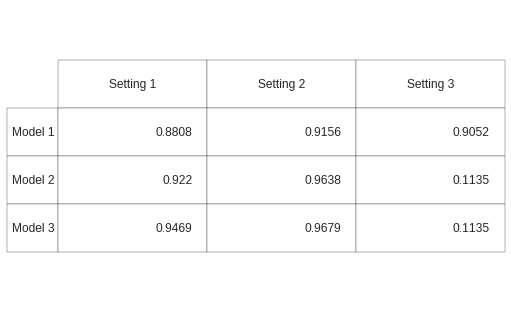

In [6]:
plot_summary_table([experiments_task1, experiments_task2, experiments_task3]) 

# Questions

### Q1.1 (3 pts): Indicate which of the previous experiments constitute an example of over-fitting. Why is this happening?

Task 3 (2 hidden layers (32 units) each, with ReLU non-linearity, followed by a softmax.) with learning rate = 0.001 and trained for 40 epochs. Test error does not increase after epoch ~30. This is happening because we are training a very expressive model (2 hidden layers) for a large number of epochs.

### Q1.2 (2 pts): Indicate which of the previous experiments constitute an example of under-fitting. Why is this happening?

For example task 1 with learning rate = 0.001 and trained for 5 epochs. We stop although the test error keeps increasing. Should have trained for longer or increased learning rate.

### Q1.3 (2 pts): How would you prevent over-/under-fitting from happening?

Underfitting can be prevented by running the optimisation for more epochs, or by choosing a network with more capacity (i.e. more layers or more neurons and connections). Overfitting can be prevented by early stopping (i.e. stopping the optimisation some time before convergence), using a weight decay (L2 regularisation of the weight parameters) or by using dropout, where in hidden layers, a random fraction of the neurons is set to zero during training, and during testing, the outputs are scaled accordingly.

### Q1.4 (8 pts): Pick one model that is over-fitting and implement your proposed fix. Train your model and report your new training/testing curves below. 

*Your answer here*

# PART 2:  Backpropagation (35 pts)

### Objectives

This part will be mirroring the first one, but this time you are **not allowed to use any of the Tensorflow functionality for specifing nor optimizing** your neural network models. 
You will now use your **own implementations** of different neural network models (labelled Model 1-3, and described in the corresponding sections of the Colab). This means for each of these models, and the layers they are composed of, you will need to implement:
* **Forward pass**
* **Backward pass**

Keep in mind, the purpose of this exercise is to implement and optimize your own neural networks
architectures without the toolbox/library tailored to do so. **This also means, in order to train and evaluate your models, you will need to implement your own optimization procedure. You are to use the same cross-entropy loss as before and your own implementation of SGD.**

As before, you will train these models to classify hand written digits from the Mnist dataset. 


#### Additional instructions

**Do not use any other libraries than the ones provided in the imports cell.** You should be able to do everything via *numpy* (especially for the convolutional layer, rely on the in-built matrix/tensor multiplication that numpy offers).  

There are a few questions at the end of the colab. **Before doing any coding, please take a look at Question 2.1** -- this should help you with the implementations, especially the optimization part.

### Hints

Remind yourselves of the chain rule and read through the lecture notes on back-propagation (computing 
the gradients by recursively applying the chain rule). This is a general procedure that applies to all model
architectures you will have to code in the following steps. Thus, you are to implement an
optimization procedure that generalizes and can be re-used to train all your models. Recall the only things
that you will need for each layer are: 

(i) the gradients of layer activations with respect to its input

(ii) the gradients with respect to its parameters, if any.

(See Question 2.1).


Also from the previous assignment, you should have a good idea of what to expect, both in terms of behavior and relative performance. (To keep everything comparable, we kept all the hyperparameters and reporting the same).




## Model 1 (10 pts)

### Network

Train a neural network model consisting of 1 linear layer, followed by a softmax:

(input $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.0001

- *num_epochs*=5, *learning_rate*=0.005

- *num_epochs*=15, *learning_rate*=0.1

In [0]:
### HELPER FUNCTIONS
def logsumexp(x):
  '''computes log of sum of exp(x_i) for x with components x_i'''
  
  x = np.array(x)
  assert x.shape[0] == 10
  m = np.amax(x, axis=0)
  return m + np.log(np.sum(np.exp(x - m), axis=0))

def glorot(fan_in, fan_out):
  '''returns randomly initialised weight matrix (from uniform distribution)'''
  return np.random.rand(fan_out,fan_in) * np.sqrt(6. / (fan_in + fan_out))


#### REUSABLE MODULES
def linear_fw(x, W, b):
  '''forward pass of linear layer'''
  return np.matmul(W,x.T) + b

def linear_bw(x, W, b, output_grad):
  '''backward pass of linear layer'''

  fan_out, fan_in = W.shape
  assert output_grad.shape == (fan_out, batch_size)
  
  return np.matmul(output_grad.T, W)

def linear_param_grad(x, W, b, output_grad):
  '''parameter gradients of linear layer'''

  fan_out, fan_in = W.shape
  assert output_grad.shape == (fan_out, batch_size)
  assert b.shape == (fan_out, 1)
  assert x.shape == (fan_in, batch_size)
  
  #SUM LOSSES ACROSS TRAINING EXAMPLES INSTEAD OF TAKING THE MEAN
  W_grad = np.einsum('in,jn->ij', output_grad, x)
  b_grad = np.sum(output_grad, axis=1, keepdims=True)
  
  return W_grad, b_grad

def xent_logits_fw(z, y):
  '''forward pass of cross-entropy loss from logits z and labels y. 
  Compound module, includes softmax.'''
  
  batch_size = y.shape[1]
  
  k = y.index(1)
  print("loss_output",-(z[k] - logsumexp(z)))
  return -(z[k] - logsumexp(z))

def xent_logits_bw(s, y):
  '''backward pass of cross-entropy loss. s = logits, y = labels'''
  assert s.shape == (10, batch_size)
  assert y.shape == (10, batch_size)
  
  return s - y

def softmax_fw(x):
  '''forward pass of softmax'''
  return np.exp(x - logsumexp(x))

def softmax_bw(y, output_grad):
  '''backward pass of softmax'''
  s = output_grad * y
  return s - y * np.sum(s)

def relu_fw(x):
  '''forward pass of relu'''
  return np.maximum(0, x)

def relu_bw(y, output_grad):
  '''backward pass of relu'''
  fan_out, batch_size = y.shape
  assert y.shape == output_grad.shape
  
  return (y > 0) * output_grad
##########

In [8]:
# Store results of runs with different configurations in a list.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
my_experiments_task1 = []
settings = [(5, 0.0001), (5, 0.001), (15, 0.1)]

print('Training Model 1')

n_input = 784
n_output = 10
n_train = mnist.train.num_examples
n_test = mnist.test.num_examples

eps = 0.001
  
# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  print("num_epochs =", num_epochs, "learning_rate =", learning_rate)

  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()
  x, y_ = get_placeholders()
  mnist = get_data()
  eval_mnist = get_data()

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################
  
  def nn1(x, W, b):
    '''calculates a forward pass on batch x. outputs softmax probabilities.
    linear layer + softmax layer'''
    output = softmax_fw(linear_fw(x, W, b))
    assert output.shape[0] == 10 
    return output
  
  #initialise params
  W = glorot(784,10)
  b = np.zeros((10,1))
  
  
  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:
      
      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      assert batch_xs.shape == (batch_size,784)
      assert batch_ys.shape == (batch_size,10)
      #################
      # Training step #
      #################
      
      #Do forward pass
      y_hat = nn1(batch_xs, W, b)
      
      #Do backward pass
      batch_xs = batch_xs.T #Each instance should be col of batch_xs
      batch_ys = batch_ys.T #Each instance should be col of batch_ys
  
      assert batch_xs.shape == (784, batch_size)
      assert batch_ys.shape == (10, batch_size)
      assert y_hat.shape == (10, batch_size)

      W_grad, b_grad = linear_param_grad(batch_xs, W, b, 
                                         xent_logits_bw(y_hat, batch_ys))
      
      assert W_grad.shape == (10,784)
      assert b_grad.shape == (10,1)
      
      #update params
      W = W - learning_rate * W_grad
      b = b - learning_rate * b_grad
      
      assert W.shape == (10,784)
      assert b.shape == (10,1)
      
      # Periodically evaluate.
      if i % log_period_updates == 0:
        
        #####################################
        # Compute and store train accuracy. #
        #####################################
        tr_xs, tr_ys = mnist.train.next_batch(n_train/5)
        assert tr_xs.T.shape == (784, n_train/5)
        tr_accuracy = np.mean(np.argmax(nn1(tr_xs, W, b),0) == np.argmax(tr_ys,axis=1))
        train_accuracy.append(tr_accuracy)
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        te_xs, te_ys = mnist.test.next_batch(n_test)
        te_accuracy = np.mean(np.argmax(nn1(te_xs, W, b),0) == np.argmax(te_ys,axis=1))
        test_accuracy.append(te_accuracy)
        
        print("iteration", i, "training acc", tr_accuracy, "testing acc", te_accuracy)
      

  my_experiments_task1.append(
      ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 1
('num_epochs =', 5, 'learning_rate =', 0.0001)
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
('iteration', 200, 'training acc', 0.7866363636363637, 'testing acc', 0.7986)
('iteration', 400, 'training acc', 0.8356363636363636, 'testing acc', 0.8335)
('iteration', 600, 'training acc', 0.8435454545454546, 'testing acc', 0.8523)
('iteration', 800, 'training acc', 0.8518181818181818, 'testing acc', 0.8607)
('iteration', 1000, 'training acc', 0.8582727272727273, 'testing acc', 0.8677)
('iteration', 1200, 'training acc', 0

## Model 2 (5 pts)

### Network
1 hidden layer (32 units) with a ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=15, *learning_rate*=0.0001

- *num_epochs*=15, *learning_rate*=0.005

- *num_epochs*=15, *learning_rate*=0.1 

In [9]:
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
my_experiments_task2 = []
settings = [(15, 0.0001), (15, 0.005), (15, 0.1)]

print('Training Model 2')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################

  def nn2(x, W1, b1, W2, b2):
    '''calculates a forward pass on batch x. 
    linear layer + relu layer + linear layer + softmax layer'''
    output = softmax_fw(linear_fw(relu_fw(linear_fw(x, W1, b1)).T, W2, b2))
    assert output.shape[0] == 10 
    return output
  
  #initialise params
  W1 = glorot(784,32)
  b1 = np.zeros((32,1))
  W2 = glorot(32,10)
  b2 = np.zeros((10,1))
  
  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:
      
      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      assert batch_xs.shape == (batch_size,784)
      assert batch_ys.shape == (batch_size,10)
      #################
      # Training step #
      #################
      
      #Do forward pass on batch x. 
      #linear layer + relu layer + linear layer + softmax layer
      
      f1 = linear_fw(batch_xs, W1, b1)
      f2 = relu_fw(f1)
      f3 = linear_fw(f2.T, W2, b2)
      y_hat = softmax_fw(f3)
     
      #Do backward pass
      batch_xs = batch_xs.T #Each instance should be col of batch_xs
      batch_ys = batch_ys.T #Each instance should be col of batch_ys
  
      assert batch_xs.shape == (784, batch_size)
      assert batch_ys.shape == (10, batch_size)
      assert y_hat.shape == (10, batch_size)
      
      t3 = xent_logits_bw(y_hat, batch_ys)
      assert t3.shape == (10, batch_size)
      W2_grad, b2_grad = linear_param_grad(f2, W2, b2, t3)
      assert W2_grad.shape == (10,32)
      assert b2_grad.shape == (10,1)
      t2 = linear_bw(f2.T, W2, b2, t3).T
      assert t2.shape == (32, batch_size)
      t1 = relu_bw(f1, t2)
      assert t1.shape == (32, batch_size)
      W1_grad, b1_grad = linear_param_grad(batch_xs, W1, b1, t1)
      assert W1_grad.shape == (32,784)
      assert b1_grad.shape == (32,1)
      
      #update params
      W1 = W1 - learning_rate * W1_grad
      b1 = b1 - learning_rate * b1_grad
      W2 = W2 - learning_rate * W2_grad
      b2 = b2 - learning_rate * b2_grad
      
      assert W1.shape == (32,784)
      assert b1.shape == (32,1)
      assert W2.shape == (10,32)
      assert b2.shape == (10,1)
      
      
      # Periodically evaluate.
      if i % log_period_updates == 0:
        
        #####################################
        # Compute and store train accuracy. #
        #####################################
        tr_xs, tr_ys = mnist.train.next_batch(n_train/5)
        assert tr_xs.T.shape == (784, n_train/5)
        tr_accuracy = np.mean(np.argmax(nn2(tr_xs, W1, b1, W2, b2),0) == np.argmax(tr_ys,axis=1))
        train_accuracy.append(tr_accuracy)
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        te_xs, te_ys = mnist.test.next_batch(n_test)
        te_accuracy = np.mean(np.argmax(nn2(te_xs, W1, b1, W2, b2),0) == np.argmax(te_ys,axis=1))
        test_accuracy.append(te_accuracy)
        
        print("iteration", i, "training acc", tr_accuracy, "testing acc", te_accuracy)
      
  my_experiments_task2.append(
      ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 2
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
('iteration', 200, 'training acc', 0.6946363636363636, 'testing acc', 0.7066)
('iteration', 400, 'training acc', 0.7989090909090909, 'testing acc', 0.8116)
('iteration', 600, 'training acc', 0.8287272727272728, 'testing acc', 0.8418)
('iteration', 800, 'training acc', 0.8428181818181818, 'testing acc', 0.8583)
('iteration', 1000, 'training acc', 0.8617272727272727, 'testing acc', 0.8722)
('iteration', 1200, 'training acc', 0.8620909090909091, 'testing acc', 0.8733)
('ite

## Model 3 (5 pts)

### Network
2 hidden layers (32 units) each, with ReLU non-linearity, followed by a softmax.

(input $\rightarrow$ non-linear layer $\rightarrow$ non-linear layer $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)


### Hyper-parameters

Train the model with three different hyper-parameter settings:

- *num_epochs*=5, *learning_rate*=0.001

- *num_epochs*=40, *learning_rate*=0.001

- *num_epochs*=40, *learning_rate*=0.05

In [10]:
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
my_experiments_task3 = []
settings = [(5, 0.001), (40, 0.001), (40, 0.05)]

print('Training Model 3')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################

  def nn3(x, W1, b1, W2, b2, W3, b3):
    '''calculates a forward pass on batch x. 
    linear + relu + linear + relu + linear + softmax'''
    output = softmax_fw(linear_fw(relu_fw(linear_fw(relu_fw(linear_fw(x, W1, b1)).T, W2, b2)).T, W3, b3))
    assert output.shape[0] == 10 
    return output
  
  #initialise params
  W1 = glorot(784,32)
  b1 = np.zeros((32,1))
  W2 = glorot(32,32)
  b2 = np.zeros((32,1))
  W3 = glorot(32,10)
  b3 = np.zeros((10,1))
   
  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:
      
      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      assert batch_xs.shape == (batch_size,784)
      assert batch_ys.shape == (batch_size,10)
      #################
      # Training step #
      #################
      
      #Do forward pass on batch x. 
      #linear + relu + linear + relu + linear + softmax
      
      f1 = linear_fw(batch_xs, W1, b1)
      f2 = relu_fw(f1)
      f3 = linear_fw(f2.T, W2, b2)
      f4 = relu_fw(f3)
      f5 = linear_fw(f4.T, W3, b3)
      y_hat = softmax_fw(f5)
     
      #Do backward pass
      batch_xs = batch_xs.T #Each instance should be col of batch_xs
      batch_ys = batch_ys.T #Each instance should be col of batch_ys
  
      assert batch_xs.shape == (784, batch_size)
      assert batch_ys.shape == (10, batch_size)
      assert y_hat.shape == (10, batch_size)
         
      t5 = xent_logits_bw(y_hat, batch_ys)
      assert t5.shape == (10, batch_size)
      W3_grad, b3_grad = linear_param_grad(f4, W3, b3, t5)
      assert W3_grad.shape == (10,32)
      assert b3_grad.shape == (10,1)
      t4 = linear_bw(f4.T, W3, b3, t5).T
      assert t4.shape == (32, batch_size)
      t3 = relu_bw(f3, t4)
      assert t3.shape == (32, batch_size)
      W2_grad, b2_grad = linear_param_grad(f2, W2, b2, t3)
      assert W2_grad.shape == (32,32)
      assert b2_grad.shape == (32,1)
      t2 = linear_bw(f2.T, W2, b2, t3).T
      assert t2.shape == (32, batch_size)
      t1 = relu_bw(f1, t2)
      assert t1.shape == (32, batch_size)
      W1_grad, b1_grad = linear_param_grad(batch_xs, W1, b1, t1)
      assert W1_grad.shape == (32,784)
      assert b1_grad.shape == (32,1)
      
      
      #update params
      W1 = W1 - learning_rate * W1_grad
      b1 = b1 - learning_rate * b1_grad
      W2 = W2 - learning_rate * W2_grad
      b2 = b2 - learning_rate * b2_grad
      W3 = W3 - learning_rate * W3_grad
      b3 = b3 - learning_rate * b3_grad
      
      assert W1.shape == (32,784)
      assert b1.shape == (32,1)
      assert W2.shape == (32,32)
      assert b2.shape == (32,1)
      assert W3.shape == (10,32)
      assert b3.shape == (10,1)
      
      # Periodically evaluate.
      if i % log_period_updates == 0:
        
        #####################################
        # Compute and store train accuracy. #
        #####################################
        tr_xs, tr_ys = mnist.train.next_batch(n_train/5)
        assert tr_xs.T.shape == (784, n_train/5)
        tr_accuracy = np.mean(np.argmax(nn3(tr_xs, W1, b1, W2, b2, W3, b3),0) == np.argmax(tr_ys,axis=1))
        train_accuracy.append(tr_accuracy)
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        te_xs, te_ys = mnist.test.next_batch(n_test)
        te_accuracy = np.mean(np.argmax(nn3(te_xs, W1, b1, W2, b2, W3, b3),0) == np.argmax(te_ys,axis=1))
        test_accuracy.append(te_accuracy)
        
        print("iteration", i, "training acc", tr_accuracy, "testing acc", te_accuracy)
      
  my_experiments_task3.append(
      ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 3
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
('iteration', 200, 'training acc', 0.42, 'testing acc', 0.4253)
('iteration', 400, 'training acc', 0.6198181818181818, 'testing acc', 0.6217)
('iteration', 600, 'training acc', 0.7489090909090909, 'testing acc', 0.7532)
('iteration', 800, 'training acc', 0.8189090909090909, 'testing acc', 0.8232)
('iteration', 1000, 'training acc', 0.8824545454545455, 'testing acc', 0.88)
('iteration', 1200, 'training acc', 0.8944545454545455, 'testing acc', 0.8956)
('iteration', 1400, '

# Results

[0.7866363636363637, 0.8356363636363636, 0.8435454545454546, 0.8518181818181818, 0.8582727272727273, 0.862909090909091, 0.8630909090909091, 0.8705454545454545, 0.8683636363636363]
[0.8724545454545455, 0.8873636363636364, 0.8955454545454545, 0.8972727272727272, 0.9041818181818182, 0.902, 0.9045454545454545, 0.9128181818181819, 0.9095454545454545]
[0.7518181818181818, 0.8947272727272727, 0.8855454545454545, 0.9045454545454545, 0.8142727272727273, 0.8787272727272727, 0.8554545454545455, 0.9038181818181819, 0.8723636363636363, 0.8935454545454545, 0.8948181818181818, 0.8925454545454545, 0.9022727272727272, 0.9137272727272727, 0.8946363636363637, 0.9098181818181819, 0.838, 0.8804545454545455, 0.9051818181818182, 0.86, 0.8864545454545455, 0.7940909090909091, 0.9124545454545454, 0.9142727272727272, 0.9071818181818182, 0.917]
[0.6946363636363636, 0.7989090909090909, 0.8287272727272728, 0.8428181818181818, 0.8617272727272727, 0.8620909090909091, 0.868909090909091, 0.8791818181818182, 0.882545454

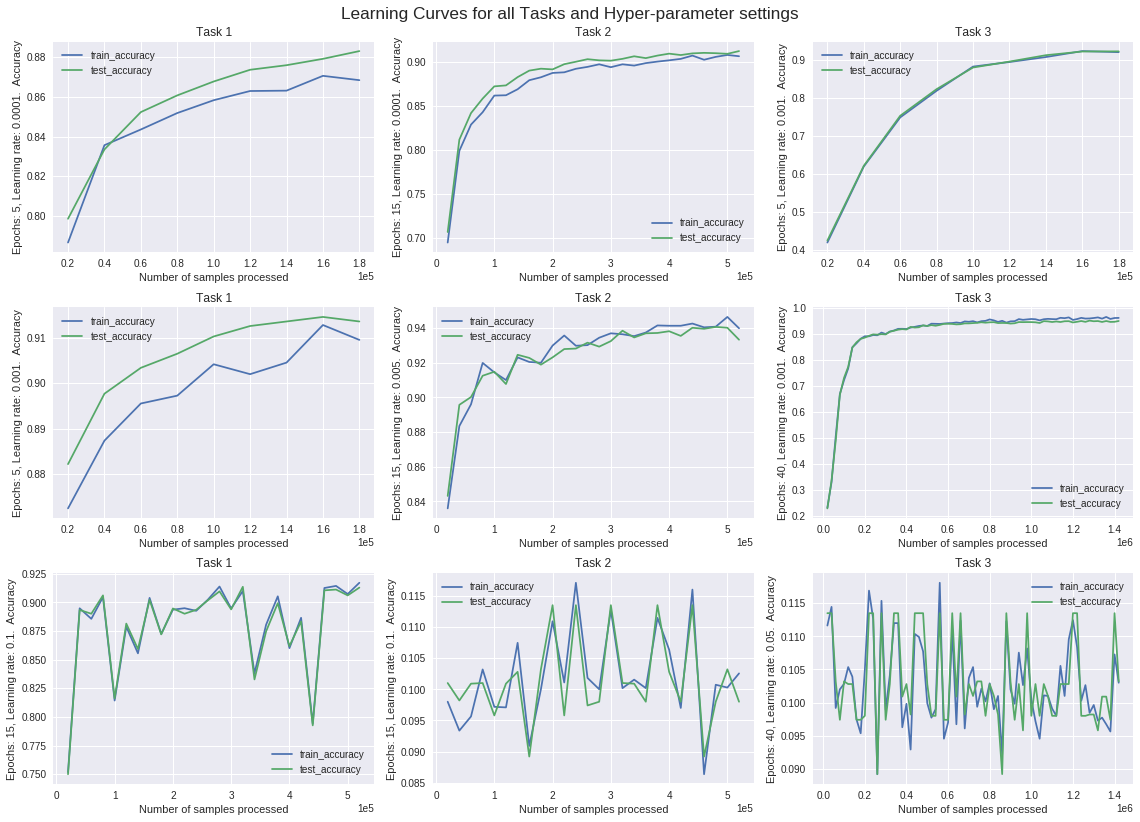

In [11]:
plot_learning_curves([my_experiments_task1, my_experiments_task2, my_experiments_task3])

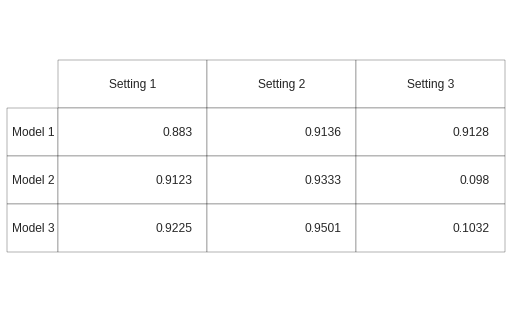

In [12]:
plot_summary_table([my_experiments_task1, my_experiments_task2, my_experiments_task3])

# Questions

###Q2.1 (15 pts): Compute the following derivatives 
Show all intermediate steps in the derivation (in markdown below). Provide the final results in vector/matrix/tensor form whenever appropiate.

a) [5 pts] Given the cross-entropy loss above, compute the derivative of the loss function with respect to the scores $z$ (the input to the softmax layer). 

Let $s(z)\in\mathbb{R}^{10}$ be the softmax function, then  $$\frac{\partial s_i}{\partial z_j}=\frac{\delta_{ij}e^{z_i}\sum_le^{z_l}-e^{z_i}e^{z_j}}{(\sum_le^{z_l})^2}=\frac{e^{z_i}}{\sum_le^{z_l}}\left(\delta_{ij}-\frac{e^{z_j}}{\sum_le^{z_l}}\right)=s_i(z)(\delta_{ij}-s_j(z)).$$ Thus 
$$\frac{\partial l}{\partial z_i}=\sum_j\frac{\partial l}{\partial s_j}\frac{\partial s_j}{\partial z_i}=-\sum_j\frac{y_j}{s_j}(s_j(\delta_{ji}-s_i))=-\sum_jy_j(\delta_{ji}-s_i)=s_i-y_i$$ whence $$\frac{\partial l}{\partial z}=(s-y)^T$$ or for multiple training examples, $$\frac{\partial l}{\partial z^{(n)}}=(s^{(n)}-y^{(n)})^T$$ for $n=1,\dots,N$.


b) [10 pts] Consider the first model (M1: linear + softmax). Compute the derivative of the loss with respect to
  * the input $x$
  * the parameters of the linear layer: weights $W$ and bias $b$

Letting $z=Wx+b$, we have that

$$\frac{\partial l}{\partial x}=\frac{\partial l}{\partial z}\frac{\partial z}{\partial x}=(s-y)^TW$$
and
$$\frac{\partial l}{\partial W_{ij}}=\sum_k\frac{\partial l}{\partial z_k}\frac{\partial z_k}{\partial W_{ij}}=\sum_k(s_k-y_k)\delta_{ik}x_j=(s_i-y_i)x_j,$$ hence
$$\frac{\partial l}{\partial W}=\frac{\partial l}{\partial z}\frac{\partial z}{\partial W}=(s-y)x^T.$$ 
Finally, $$\frac{\partial l}{\partial b} = \frac{\partial l}{\partial z}\frac{\partial z}{\partial b}=(s-y)^TI=(s-y)^T.$$ These can, like above, be summed over all training examples.
  


# PART 3: Convolution Models (35 pts)



### Model 4 (5 pts)

### Model
3 layer convolutional model (2 convolutional layers followed by max pooling) + 1 non-linear layer (32 units), followed by softmax. 

(input(28x28) $\rightarrow$ conv(3x3x8) + maxpool(2x2) $\rightarrow$ conv(3x3x8) + maxpool(2x2) $\rightarrow$ flatten $\rightarrow$ non-linear $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)


- Use *padding = 'SAME'* for both the convolution and the max pooling layers. 

- Employ plain convolution (no stride) and for max pooling operations use 2x2 sliding windows, with no overlapping pixels (note: this operation will down-sample the input image by 2x2).

### Hyper-parameters

Train the model with three different hyper-parameter settings:

- num_epochs=5, learning_rate=0.01

- num_epochs=10, learning_rate=0.001

- num_epochs=20, learning_rate=0.001 

In [39]:
######## REUSABLE MODULES

def conv33_fw(x, W, bias):
  '''forward pass of conv layer (1 output channel)'''
  
  d, _, batch_size = x.shape
  
  #pad with zeroes ('same')
  x = np.pad(x, ((1,1),(1,1),(0,0)), 'constant')
  
  #slide 3x3 kernel over image
  #return np.einsum('kl,(i+k-1)(j+l-1)->ij', W, x) + b
  output = np.zeros((d,d,batch_size))
  for b in range(batch_size):
    for i in range(d):
      for j in range(d):
        s = 0
        for k in range(3):
          for l in range(3):
            s += W[k,l] * x[i + k, j + l, b]
        output[i,j,b] = s
  return output + bias
  
def conv33_bw(I, output, W, b, output_grad):
  pass

def conv33_param_grad(I, output, W, b, output_grad):
  
  d, _, batch_size = output.shape
  assert batch_size == I.shape[2]
  assert W.shape == (3,3)
  print("output_grad.shape", output_grad.shape)
  assert output_grad.shape == (d, d, batch_size) 
  
  I = np.pad(I, ((1,1),(1,1),(0,0)), 'constant')

  b_grad = output
  
  W_grad_ = np.zeros((d, d, 3, 3, batch_size))
  for b in range(batch_size):
    for m in range(3):
      for n in range(3):
        for i in range(d):
          for j in range(d):
            W_grad_[i,j,m,n,b] = I[i + m, j + n, b]
  
  output_grad = np.expand_dims(output_grad, axis=(2,3))
  output_grad = np.tile(output_grad, axis=(2,3))
  
  W_grad = np.sum(W_grad_ * output_grad, axis=(0,1,4))
  
  return b_grad, W_grad

def maxpool22_fw(x):
  '''forward pass of 2x2 max-pooling'''
  
  d, _, batch_size = x.shape
  output = np.zeros((d/2, d/2, batch_size))
  inds = np.zeros(x.shape)
  for b in range(batch_size):
    for i in range(d/2):
      for j in range(d/2):
        ind1, ind2 = np.unravel_index(x[2*i : (2*i+2), (2*j) : (2*j+2), b].argmax(),(2,2))
        inds[2*i + ind1, 2*j + ind2, b] = 1
        output[i,j,b] = x[ind1, ind2, b]
  return output, inds

def maxpool22_bw(inds, output_grad):
  output = np.zeros(inds.shape)
  d, _, batch_size = inds.shape
  for b in range(batch_size):
    for i in range(d):
      for j in range(d):
        if inds[i,j,b] == 1:
          output[i,j,b] = output_grad[i % 2, j %2, b]
  return output

x = np.random.randn(4,4,1)
W = np.eye(3)
b = 0

print(x)
print(W)
O = conv33_fw(x, W, b)
print(O)
print(maxpool22_fw(O))

[[[-0.82935513]
  [-0.24550698]
  [ 0.64873629]
  [ 1.57716645]]

 [[ 0.00520054]
  [ 1.03836409]
  [-0.9133889 ]
  [-0.45899756]]

 [[-0.71549009]
  [ 0.40530604]
  [ 0.39392424]
  [-0.89855004]]

 [[ 0.50078924]
  [ 0.98072504]
  [ 0.56451431]
  [ 0.2950902 ]]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[[ 0.20900896]
  [-1.15889588]
  [ 0.18973873]
  [ 1.57716645]]

 [[ 0.41050658]
  [ 0.6029332 ]
  [-2.05744592]
  [ 0.18973873]]

 [[ 0.26523495]
  [ 0.97502089]
  [ 1.72737854]
  [-1.81193894]]

 [[ 0.50078924]
  [ 0.26523495]
  [ 0.96982036]
  [ 0.68901444]]]
(array([[[ 0.6029332 ],
        [-1.15889588]],

       [[-1.15889588],
        [ 0.20900896]]]), array([[[0.],
        [0.],
        [0.],
        [1.]],

       [[0.],
        [1.],
        [0.],
        [0.]],

       [[0.],
        [1.],
        [1.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.]]]))


In [38]:
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task4 = []
settings = [(5, 0.01), (10, 0.001), (20, 0.001)]

print('Training Model 4')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  x_image = tf.reshape(x, [-1, 28, 28, 1])
  print(x_image.shape)
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################


  def conv1(x, W1, b1, W2, b2, W3, b3, W4, b4):
    '''calculates a forward pass on batch x. 
    input(28x28)  →  conv(3x3x8) + maxpool(2x2)  →  conv(3x3x8) + maxpool(2x2)  →  flatten  →  non-linear  →  linear layer  →  softmax '''

    f1 = conv33_fw(x, W1, b1)
    assert f1.shape == (28, 28)
    f2 = maxpool22_fw(f1)
    assert f2.shape == (14, 14)
    f3 = conv33_fw(f2, W2, b2)
    assert f3.shape == (14, 14)
    f4 = maxpool22_fw(f3)
    assert f4.shape == (7, 7)
    f5 = f4.flatten()
    assert f5.shape == (49, 1)
    f6 = linear_fw(f5, W3, b3)
    assert f6.shape == (32, 1)
    f7 = relu_fw(f6)
    assert f7.shape == (32, 1)
    f8 = linear_fw(f7.T, W4, b4)
    assert f8.shape == (10, 1)
    y_hat = softmax_fw(f9)
    assert y_hat.shape[0] == 10
  
    return y_hat
  
  #initialise params
  W1 = glorot(3,3) #conv kernel
  b1 = 0
  W2 = glorot(3,3) #conv kernel
  b2 = 0
  W3 = glorot(49,32) #linear
  b3 = np.zeros((32,1))
  W4 = glorot(32,10) #linear
  b4 = np.zeros((10,1))
   
  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:
      
      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      assert batch_xs.shape == (batch_size,784)
      assert batch_ys.shape == (batch_size,10)
      #################
      # Training step #
      #################
      
      #Do forward pass on batch x. 
      #input(28x28)  →  conv(3x3x8) + maxpool(2x2)  →  conv(3x3x8) + maxpool(2x2)  →  flatten  →  non-linear  →  linear layer  →  softmax  
      
      batch_xs = np.reshape(batch_xs, [28,28,batch_size])
      batch_ys = batch_ys.T
      
      f1 = conv33_fw(batch_xs, W1, b1)
      assert f1.shape == (28, 28, batch_size)
      f2, inds1 = maxpool22_fw(f1)
      assert f2.shape == (14, 14, batch_size)
      assert inds1.shape == (28, 28, batch_size)
      f3 = conv33_fw(f2, W2, b2)
      assert f3.shape == (14, 14, batch_size)
      f4, inds2 = maxpool22_fw(f3)
      assert f4.shape == (7, 7, batch_size)
      assert inds2.shape == (14, 14, batch_size)
      f5 = np.reshape(f4, [49, batch_size]) #flatten
      assert f5.shape == (49, batch_size)
      f6 = linear_fw(f5.T, W3, b3)
      assert f6.shape == (32, batch_size)
      f7 = relu_fw(f6)
      assert f7.shape == (32, batch_size)
      f8 = linear_fw(f7.T, W4, b4)
      assert f8.shape == (10, batch_size)
      y_hat = softmax_fw(f8)
      assert y_hat.shape == (10, batch_size)
      print("fw successful")
      
      
      #Do backward pass (each instance is in last dim)
         
      t8 = xent_logits_bw(y_hat, batch_ys)
      assert t8.shape == (10, batch_size)
      
      
      W4_grad, b4_grad = linear_param_grad(f7, W4, b4, t8)
      assert W4_grad.shape == (10,32) #needs to be (fan_out, fan_in)
      assert b4_grad.shape == (10,1)
      t7 = linear_bw(f7.T, W4, b4, t8).T
      assert t7.shape == (32, batch_size)
      t6 = relu_bw(f6, t7)
      assert t6.shape == (32, batch_size)
      W3_grad, b3_grad = linear_param_grad(f5, W3, b3, t6)
      assert W3_grad.shape == (32,49)
      assert b3_grad.shape == (32,1)
      t5 = linear_bw(f5.T, W3, b3, t6).T
      assert t5.shape == (49, batch_size)
      t4 = np.reshape(t5, [7,7,batch_size])
      assert t4.shape == (7,7,batch_size)
      print("backward stuff from before ok")
      t3 = maxpool22_bw(inds2, t4)
      assert t3.shape == (14, 14, batch_size)
      b2_grad, W2_grad = conv33_param_grad(f2, f3, W2, b2, t3)
      assert W2_grad.shape == (3,3)
      
      t2 = conv33_bw(t3)
      assert t_1.shape == (49,49,batch_size)
      
      t1 = maxpool22_bw(inds1, t2)
      assert t1.shape == (14,14,batch_size)
      
      W1_grad, b1_grad = conv33_param_grad(t1)
      assert W1_grad.shape == (3,3)
      assert b1_grad.shape == (0,)
      
      
      
      
      
      print("bw successful")
      
      
      #update params
      W1 = W1 - learning_rate * W1_grad
      b1 = b1 - learning_rate * b1_grad
      W2 = W2 - learning_rate * W2_grad
      b2 = b2 - learning_rate * b2_grad
      W3 = W3 - learning_rate * W3_grad
      b3 = b3 - learning_rate * b3_grad
      W4 = W4 - learning_rate * W4_grad
      b4 = b4 - learning_rate * b4_grad
      
      # Periodically evaluate.
      if i % log_period_updates == 0:
        
        #####################################
        # Compute and store train accuracy. #
        #####################################
        tr_xs, tr_ys = mnist.train.next_batch(n_train/5)
        assert tr_xs.T.shape == (784, n_train/5)
        tr_accuracy = np.mean(np.argmax(conv1(tr_xs, W1, b1, W2, b2, W3, b3, W4, b4),0) == np.argmax(tr_ys,axis=1))
        train_accuracy.append(tr_accuracy)
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################
        te_xs, te_ys = mnist.test.next_batch(n_test)
        te_accuracy = np.mean(np.argmax(conv1(te_xs, W1, b1, W2, b2, W3, b3, W4, b4),0) == np.argmax(te_ys,axis=1))
        test_accuracy.append(te_accuracy)
        
        print("iteration", i, "training acc", tr_accuracy, "testing acc", te_accuracy)
      
        experiments_task4.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

Training Model 4
(?, 28, 28, 1)
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
fw successful
backward stuff from before ok
('I.shape', (14, 14, 100))
('output.shape', (14, 14, 100))
('W_grad_.shape', (14, 14, 3, 3, 100))
('W_grad.shape', (3, 3))


TypeError: ignored

In [0]:
x = np.random.randn(3,3)
np.pad(x, 1, 'constant')

## Model 5 (10 pts): Separable Convolutions

### Separable Convolutions 
The idea behind separable convolutions is very simple. The premise is that if we consider a 2D/3D filter we would want to apply to an input tensor $x$, we could produce a very similar effect by instead applying a series of simpler transformations (in our case convolutions). Doing this would typically end up in less computations and/or fewer parameters (which in a learn). 

**Example 1:** An famous example of such a 2D filter is the Sobel kernel. 
\\begin{equation}
\\begin{bmatrix} 
-1 & 0 & +1 \\\
-2 & 0 & +2 \\\ 
-1 & 0 & +1
\\end{bmatrix} 
=
\\begin{bmatrix} 
1  \\\
2 \\\ 
1 
\\end{bmatrix} \times [-1, 0,1]
\\end{equation}

Thus we can see that this $3 \times 3$ kernel $k$ can be expressed as the dot product  of $3 \times 1$ kernel $k_1$ and $1 \times 3$ kernel $k_2$. The above is a particular example of a spatial separable convolution, but the principle is more generally applicable. And a common model of 'separating' a kernel is essentially separating the normal convolution process in two parts: a depthwise convolution and a pointwise convolution. The depthwise convolution applies a different convolution kernel to every input channel. This will produce an output tensor with the same number of input channels. Then the pointwise convolution will take this intermediate result and apply a $1 \times 1 \times n_{input\_channels}$ kernel to it. As the name suggests this will look individually at every point in the intermediate output. And we will apply as many of these as we need to produce the desired output channels.


**Example 2**: For instance, if we consider a $3\times 3$ convolutional kernel with $16$ input channels and $64$ output channels. The depthwise convolution will be a $3\times 3 \times 16$ kernel (a $3 \times 3$ kernel for each input channel) and the pointwise kernel will be made of $64$ $1\times 1 \times 16$ kernels.

\\

**References and Further Reading:** \\
[Mobilenet](https://arxiv.org/pdf/1704.04861.pdf) \\
[Inception Models](https://arxiv.org/abs/1610.02357) 


### Model 5
3 layer convolutional model, similar to Model 4, but now with separable convolutions + 1 non-linear layer (32 units), followed by softmax. 

(input(28x28) $\rightarrow$ separable conv(3x3x8)$\rightarrow$ separable conv(3x3x4) + maxpool(2x2) $\rightarrow$ flatten $\rightarrow$ non-linear $\rightarrow$ linear layer $\rightarrow$ softmax $\rightarrow$ class probabilities)


- Use *padding = 'SAME'* for both the convolution and the max pooling layers. 

- No stride. Use max pooling with 2x2 sliding windows, with no overlapping pixels (note: this operation will down-sample the input image by 2x2).

In [0]:
# Store results of runs with different configurations in a dictionary.
# Use a tuple (num_epochs, learning_rate) as keys, and a tuple (training_accuracy, testing_accuracy)
experiments_task5 = []
settings = [(5, 0.01), (10, 0.001), (20, 0.001)]

print('Training Model 5')

# Train Model 1 with the different hyper-parameter settings.
for (num_epochs, learning_rate) in settings:
  
  # Reset graph, recreate placeholders and dataset.
  tf.reset_default_graph()  # reset the tensorflow graph
  x, y_ = get_placeholders()
  x_image = tf.reshape(x, [-1, 28, 28, 1])
  mnist = get_data()  # use for training.
  eval_mnist = get_data()  # use for evaluation.

  #####################################################
  # Define model, loss, update and evaluation metric. #
  #####################################################

  # Train.
  i, train_accuracy, test_accuracy = 0, [], []
  log_period_updates = int(log_period_samples / batch_size)
  with tf.train.MonitoredSession() as sess:
    while mnist.train.epochs_completed < num_epochs:

      # Update.
      i += 1
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)

      #################
      # Training step #
      #################

      # Periodically evaluate.
      if i % log_period_updates == 0:

        #####################################
        # Compute and store train accuracy. #
        #####################################
        
        #####################################
        # Compute and store test accuracy.  #
        #####################################

    experiments_task5.append(
        ((num_epochs, learning_rate), train_accuracy, test_accuracy))

# Results

In [0]:
plot_learning_curves([experiments_task3, experiments_task4, experiments_task5])

In [0]:
plot_summary_table([experiments_task3, experiments_task4, experiments_task5])

# Questions

### Q3.1 (2 pts): Let's revisit Example 2 above (Sec. Separable Convolutions). Given an input image of $28 \times 28 \times 16$:
* a) What are the dimensions of the result of the depthwise convolution? How many computations were performed in this step? \\
* b) What about the dimension of the output after the pointwise convolution?  How many computations were perfomend in this step? \\
* c) Compare this with applying a normal 2D convolution $3\times 3 \times 64$ to the orginal image. What is the dimensionality of the output? What about the number of computations?

*Your answer here*

### Q3.1 (3 pts): Convolutions vs Separable Convolutions  
* Compare the performance of the two convolutional model vs previous models in Part 1.
* Compare the number of parameters in Model 5 vs Model 4? Explicit computation is required here. 
* Under which conditions could it be advantageous to use separable convolutions instead of normal convolutions?  \\

**Hint:** Think in terms of storage, speed of training, speed of inference, representation power.

*Your answer here*

### Q3.3 (7 pts): Equivalence between 2D convolutions and separable convolutions.

Let's revisit **Example 1** above. Consider a 2D kernel $k$ of dimension $N\times M$ and two 1D kernels: $k_1$, a $1\times N$ and $k_2$, a $1 \times N$ kernel such that $k = k_1^Tk_2$. 
* Prove that the above equality holds, $k = k_1^Tk_2$, applying $k$ to an input signal $x$ is equivalent to applying consecutively the 1D kernels $k_1$ and $k_2$. In which order do these 1D kernels need to be applied for the equivalence to hold?

* Does there always exist such a decomposition? That is, for any 2D kernel $k$, can one find $k_1$ and $k_2$ s.t. $k = k_1^Tk_2$? If so, provide a proof. If not, provide a counter-example.

*Your answer here*

### Q3.4 (8 pts): Based potentially on insights from Q3.3. propose a different separate conv. model that achieves similar performance as Model 4, but has fewer parameters. 

a) Report and justify your choice. 

*Your answer here*

b) Implement, train your model and compare perfomance with Model 4 (setting 3). \\
**Note**:This will likely require a hyperparameter search for the new setting.

*Your answer below*